In [6]:
# importing libarires
from matplotlib import cm  # color map
import math
import matplotlib.pyplot as plt #matplotlib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns 
from sklearn import metrics
from numpy.linalg import eig

## Question No. 1

## 1.a) Import the dataset

In [2]:
csvfile = pd.read_csv(r"C:\Users\sonuk\Downloads\iris.csv",header = None)  
df = csvfile.rename(columns = {0:'sepal_length' ,1:'sepal_width',2:'petal_length',3:'petal_width',4:'class'})

## 1.b) Spilit the dataset

In [3]:
y = df['class']
X = df[['sepal_length','sepal_width', 'petal_length', 'petal_width']]
X1_train, X1_test, y1_train_target, y1_test_target = train_test_split(X, y, test_size = 0.75, random_state = 50)
X2_train, X2_test, y2_train_target, y2_test_target = train_test_split(X, y, test_size = 0.20, random_state = 50)
data_train1 = pd.concat([X1_train, y1_train_target], axis = 1)
data_train2 = pd.concat([X2_train, y2_train_target], axis = 1)
data_test1 = pd.concat([X1_test, y1_test_target], axis=1)
data_test2 = pd.concat([X2_test, y2_test_target], axis=1)
data_train1.reset_index(drop=True, inplace=True)
data_train2.reset_index(drop=True, inplace=True)
data_test1.reset_index(drop=True, inplace=True)
data_test2.reset_index(drop=True, inplace=True)

## 1.c) Training and testing the model

In [4]:
# defining SVM classifier 
classifier = svm.SVC(kernel ="linear")
classifier.fit(X1_train,y1_train_target)
prediction = classifier.predict(X1_test)


## 1.d) Performance of model via Confusion matrix

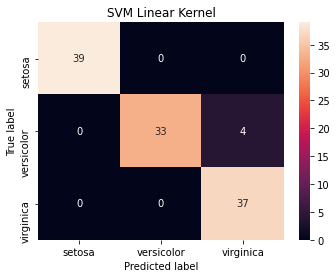

In [7]:
cm1 = confusion_matrix(y1_test_target, y_pred=prediction) 
cm_df1 = pd.DataFrame(cm1,index = ['setosa','versicolor','virginica'],columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df1, annot=True)
plt.title('SVM Linear Kernel')
plt.ylabel('True label')
plt.xlabel('Predicted label') 
plt.show()


## 1.e) Accuracy

In [8]:
acc1 = metrics.accuracy_score(y1_test_target,y_pred=prediction)
print("accuracy of the model when test split is 75% is : ",acc1)
clsfm1 = metrics.classification_report(y1_test_target,y_pred=prediction)
print("classification report of model is : \n",clsfm1)

accuracy of the model when test split is 75% is :  0.9646017699115044
classification report of model is : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       1.00      0.89      0.94        37
 Iris-virginica       0.90      1.00      0.95        37

       accuracy                           0.96       113
      macro avg       0.97      0.96      0.96       113
   weighted avg       0.97      0.96      0.96       113



## 1.f) Split ratio chnage for testing 

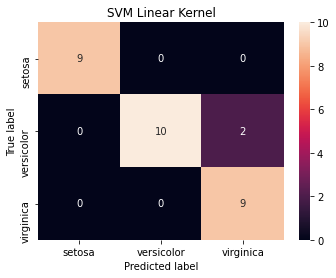

accuracy of the model when test split is 20% is :  0.9333333333333333
classification report of model is : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.82      1.00      0.90         9

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.95      0.93      0.93        30



In [9]:
# defining classifier
classifier = svm.SVC(kernel ="linear")
classifier.fit(X2_train,y2_train_target)
prediction = classifier.predict(X2_test)

# confusion matrix
cm2 = confusion_matrix(y2_test_target, y_pred=prediction) 
cm_df2 = pd.DataFrame(cm2,index = ['setosa','versicolor','virginica'],columns = ['setosa','versicolor','virginica'])

# plotting confusion matrix
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df2, annot=True)
plt.title('SVM Linear Kernel')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# calculating accuracy and classification report
acc2 = metrics.accuracy_score(y2_test_target,y_pred=prediction)
print("accuracy of the model when test split is 20% is : ",acc2)
clsfm2 = metrics.classification_report(y2_test_target,y_pred=prediction)
print("classification report of model is : \n",clsfm2)

## Question No.2

## 2.a) Import iris dataset

In [10]:
csvfile = pd.read_csv(r"C:\Users\sonuk\Downloads\iris.csv",header = None)  
df2 = csvfile.rename(columns = {0:'sepal_length' ,1:'sepal_width',2:'petal_length',3:'petal_width',4:'species'})

## 2.b) Visualize the Dataset

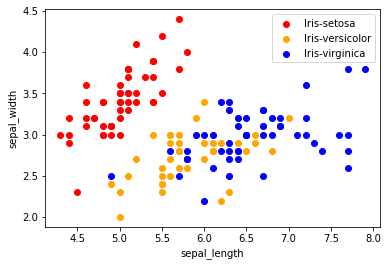

In [16]:
colors = ['red','orange','blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']
# plot 1 for sepal length and sepal width
for i in range(3):
    x = df2[df2['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend()
plt.show()

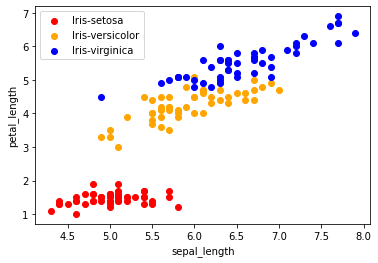

In [17]:
# plot 2 for sepal length and petal length
for i in range(3):
    x = df2[df2['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.legend()
plt.show()

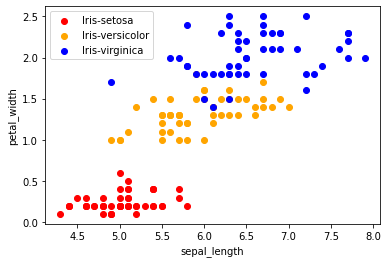

In [18]:
# plot 3 for sepal length and petal width
for i in range(3):
    x = df2[df2['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("sepal_length")
plt.ylabel("petal_width")
plt.legend()
plt.show()

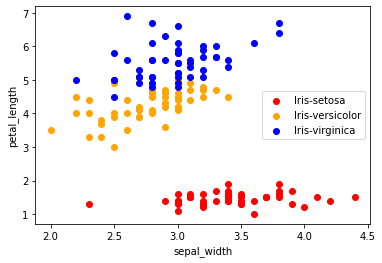

In [19]:
# plot 4 for sepal width and petal length
for i in range(3):
    x = df2[df2['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel("sepal_width")
plt.ylabel("petal_length")
plt.legend()
plt.show()

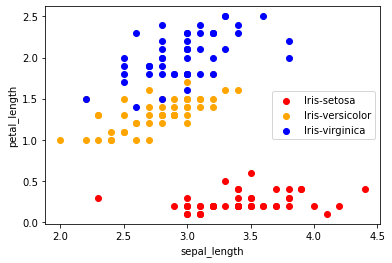

In [20]:
# plot 5 for sepal width and petal width
for i in range(3):
    x = df2[df2['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.legend()
plt.show()

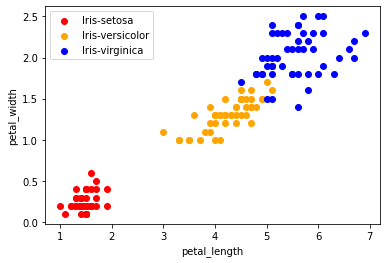

In [21]:
# plot 6 for petal length and petal width
for i in range(3):
    x = df2[df2['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()
plt.show()

## 2.c) Normalize the dataset

In [22]:
feature1 = df2['sepal_length']
feature2 = df2['sepal_width']
feature3 = df2['petal_length']
feature4 = df2['petal_width']
a1 = max(feature1)
a2 = min(feature1)
b1 = max(feature2)
b2 = min(feature2)
c1 = max(feature3)
c2 = min(feature3)
d1 = max(feature4)
d2 = min(feature4)
df2['sepal_length'] = (feature1-a2)/(a1-a2)
df2['sepal_width']= (feature2-b2)/(b1-b2)
df2['petal_length'] = (feature3-c2)/(c1-c2)
df2['petal_width'] = (feature4-d2)/(d1-d2)
print("Normalized dataset are : \n ",df2)

Normalized dataset are : 
       sepal_length  sepal_width  petal_length  petal_width         species
0        0.222222     0.625000      0.067797     0.041667     Iris-setosa
1        0.166667     0.416667      0.067797     0.041667     Iris-setosa
2        0.111111     0.500000      0.050847     0.041667     Iris-setosa
3        0.083333     0.458333      0.084746     0.041667     Iris-setosa
4        0.194444     0.666667      0.067797     0.041667     Iris-setosa
..            ...          ...           ...          ...             ...
145      0.666667     0.416667      0.711864     0.916667  Iris-virginica
146      0.555556     0.208333      0.677966     0.750000  Iris-virginica
147      0.611111     0.416667      0.711864     0.791667  Iris-virginica
148      0.527778     0.583333      0.745763     0.916667  Iris-virginica
149      0.444444     0.416667      0.694915     0.708333  Iris-virginica

[150 rows x 5 columns]


## 2.d) Mean and Covariance Matrix 

In [23]:
# dropping of species column for calculation purpose
df21 = df2.drop(['species'], axis = 1) 

In [24]:
df22 = df21.to_numpy()   # convert dataframe to numpy array 
# Calculating mean across features
feature_mean = np.mean(df22, axis=0)   
feature1_mean = feature_mean[0] 
print("Mean of feature 1 is", feature1_mean)   
feature2_mean = feature_mean[1] 
print("Mean of feature 2 is", feature2_mean)   
feature3_mean = feature_mean[2] 
print("Mean of feature 3 is", feature3_mean) 
feature4_mean = feature_mean[3] 
print("Mean of feature 3 is", feature4_mean) 
#mean of all feature vector 
mean = feature_mean[0:4]
print("1*4 mean vector are : \n ",mean)

Mean of feature 1 is 0.42870370370370364
Mean of feature 2 is 0.43916666666666665
Mean of feature 3 is 0.4675706214689264
Mean of feature 3 is 0.45777777777777773
1*4 mean vector are : 
  [0.4287037  0.43916667 0.46757062 0.45777778]


In [25]:
# calculating covarience matrix
covMatrix = pd.DataFrame.cov(df21)
print ("covarience matrix for iris dataset are : \n ",covMatrix)

covarience matrix for iris dataset are : 
                sepal_length  sepal_width  petal_length  petal_width
sepal_length      0.052908    -0.004545      0.059966     0.059827
sepal_width      -0.004545     0.032640     -0.022720    -0.020483
petal_length      0.059966    -0.022720      0.089433     0.091553
petal_width       0.059827    -0.020483      0.091553     0.101114


## 2.e) Eigen Decomposition

In [26]:
cov = covMatrix.to_numpy()
values , vectors = eig(cov)
# the Eigen Values denote the variance among that direction
print("eigen values of a covarience matrix are : \n ",values)
#The Eigen Vectors denote the direction of spread
print("eigen vectors of a covarience matrix are : \n ",vectors)

eigen values of a covarience matrix are : 
  [0.23231168 0.03239279 0.00963728 0.00175337]
eigen vectors of a covarience matrix are : 
  [[ 0.4252893  -0.42100611 -0.71434339  0.36276216]
 [-0.14612219 -0.90470509  0.33510219 -0.21877734]
 [ 0.61610511  0.06432645 -0.06825927 -0.78205964]
 [ 0.64667752  0.01116485  0.61054133  0.45708076]]


## 2.f) Principal Components

In [27]:

eig_val = np.sort(values)[::-1][:2] # sorted values in decending order and taking starting 2 eigen value 
eig_fun = vectors[:,[0,1]]   # take corresponding eigen vector and then change them into row 
print("sort eig val : \n",eig_val)
P = np.matrix(eig_fun)  # convert array to 4*2 matrix
print("projection matrix : \n ",P)

sort eig val : 
 [0.23231168 0.03239279]
projection matrix : 
  [[ 0.4252893  -0.42100611]
 [-0.14612219 -0.90470509]
 [ 0.61610511  0.06432645]
 [ 0.64667752  0.01116485]]


## 2.g) Projecting to new feature space

In [28]:
X = df21.to_numpy()   # converting dataframe to numpy array
Y = X.dot(P)   # doing matrix multiplication 
Princi_Y= pd.DataFrame(data = Y , columns = ['principal 1', 'principal 2'])
Y_new = pd.concat([Princi_Y,pd.DataFrame(df2,columns = ['species'])], axis = 1)
print("new projected dataset are : \n ",Y_new)
 

new projected dataset are : 
       principal 1  principal 2         species
0       0.071897    -0.654171     Iris-setosa
1       0.078712    -0.442302     Iris-setosa
2       0.032466    -0.495395     Iris-setosa
3       0.047625    -0.443824     Iris-setosa
4       0.053995    -0.680173     Iris-setosa
..           ...          ...             ...
145     1.254013    -0.601605  Iris-virginica
146     1.108536    -0.370388  Iris-virginica
147     1.149551    -0.579611  Iris-virginica
148     1.191476    -0.691736  Iris-virginica
149     1.014337    -0.511464  Iris-virginica

[150 rows x 3 columns]


## 2.h) Final Visualization

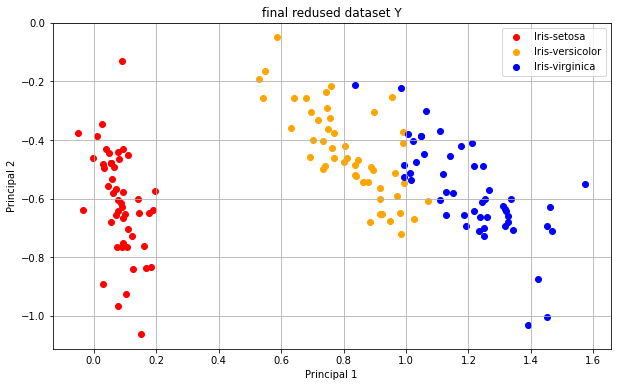

In [29]:
# visualization of principal component
fig = plt.figure(figsize = (10,6))  
ax = fig.add_subplot(1,1,1) 
colors = ['red','orange','blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
    x = Y_new[Y_new['species']==species[i]]
    ax.scatter(x['principal 1'],x['principal 2'],c=colors[i],label=species[i])    
ax.set_xlabel('Principal 1')
ax.set_ylabel('Principal 2')
ax.set_title('final redused dataset Y')
ax.legend(species)  
ax.grid()    